In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [19]:
file_path = r"C:\Users\12489\Documents\Data\advertising.csv"

df = pd.read_csv(file_path, index_col=0)
df.columns = ['TV', 'Radio', 'Newspaper', 'Sales']
df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [20]:
df.shape

(200, 4)

<AxesSubplot:xlabel='Newspaper', ylabel='Sales'>

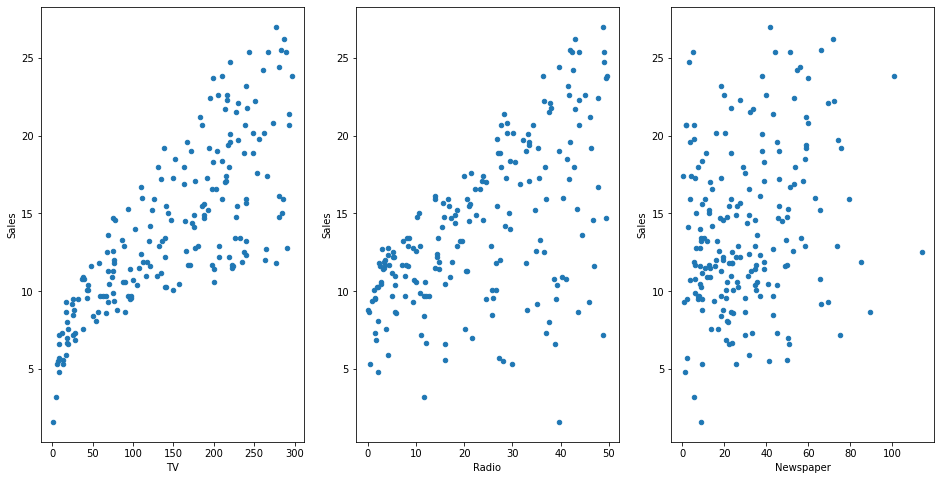

In [21]:
fig, axs = plt.subplots(1,3)
#fig, axs = plt.subplots(1,3, sharey=True)

df.plot(kind='scatter', x='TV', y='Sales', ax=axs[0], figsize=(16,8))
df.plot(kind='scatter', x='Radio', y='Sales', ax=axs[1])
df.plot(kind='scatter', x='Newspaper', y='Sales', ax=axs[2])

In [22]:
X = df[['TV']]
y = df[['Sales']]

In [23]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X,y) 

LinearRegression()

In [24]:
linreg.intercept_

array([7.03259355])

In [25]:
linreg.coef_

array([[0.04753664]])

In [27]:
import statsmodels.formula.api as smf
linreg = smf.ols(formula='Sales ~ TV', data=df).fit()

In [28]:
linreg.conf_int()

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [29]:
linreg.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [30]:
linreg.rsquared

0.611875050850071

In [31]:
#########################

In [32]:
# multiple linear regression

In [33]:
X_mult = df[['TV', 'Radio', 'Newspaper']]
y_mult = df[['Sales']]

In [34]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X_mult, y_mult, test_size=0.3, random_state=42)

In [35]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [36]:
lm.intercept_

array([2.70894909])

In [37]:
lm.coef_

array([[0.04405928, 0.1992875 , 0.00688245]])

In [38]:
predictions = lm.predict(X_test)
sqrt(mean_squared_error(y_test, predictions))

1.9485372043446387

In [39]:
lm = smf.ols(formula='Sales~TV + Radio + Newspaper', data = df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 13 Feb 2022   Prob (F-statistic):           1.58e-96
Time:                        19:13:35   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""